# 1.1 Example: Polynomial Curve Fitting


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline


Suppose there are a training set $\textbf{x} \equiv (x_1, ..., x_N)^{T}$, and a target set $\textbf{t} \equiv (t_1, ..., t_N)^{T}$. They are all fit into a function:
$$
t = \sin(2\pi x) + \epsilon
$$,
in which the $\epsilon$ is a small level of random noice having a Gaussian distribution.

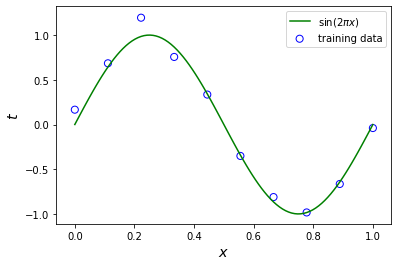

In [2]:
def create_data(sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_target = create_data(10, 0.15)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_target, facecolor="none", edgecolor="blue", s=50, label="training data")
plt.plot(x_test, y_test, c="green", label="$\sin(2\pi x)$")
plt.xlabel("$x$", fontsize="x-large")
plt.ylabel("$t$", fontsize="x-large")
plt.legend()

The goal is to predict $\hat{t}$ as a target variable by given some new value $\hat{x}$ as an input variable. And the method here can be used to solve this problem is called **polynomial curve fitting**, which is a function of the form
$$
y(x, \textbf{w}) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \Sigma^M_{j=0}w_j x^j
$$
in which $M$ is the *order* of the polynomial, and $x^j$ denotes $x$ rasised to the power of $j$, as well as $\textbf{w} \equiv (w_0, w_1, ..., w_M)$ is a vector used to represent the polynomial coefficients. These coefficients can be found by fitting the polynomial to the training data. In this case, it is to minimize an *error function*. The common error function is 
$$
E(\textbf{w}) = \frac{1}{2} \Sigma^N_{n=1} \{y(x_n, \textbf{w}) - t_n\}^2
$$
which is used to measures misfit between $y(x, \textbf{w})$ and target values $t_n$, and where the $\frac{1}{2}$ is included for later convenience. By the way, this error function will only print nonnegative quantity usually or zero iff $y(x, \textbf{w})$ passed through all training data points. 

The best way to solve this problem is choosing the value of $\textbf{w}$ as small as possible for $E(\textbf{w})$. And since $y(x, \textbf{w})$ is a quadratic function, it can be solved by finding derivatives with respect to the coefficients $\textbf{w}$ in which it should be linear and has a unique solution, denoted by $\textbf{w}^{*}$. It derives $y(x, \textbf{w}^{*})$. And another important task for solving this problem is to select the order $M$ of polynomial (*model comparison* or *model selection*). Let $M = 0,1,3,9$.

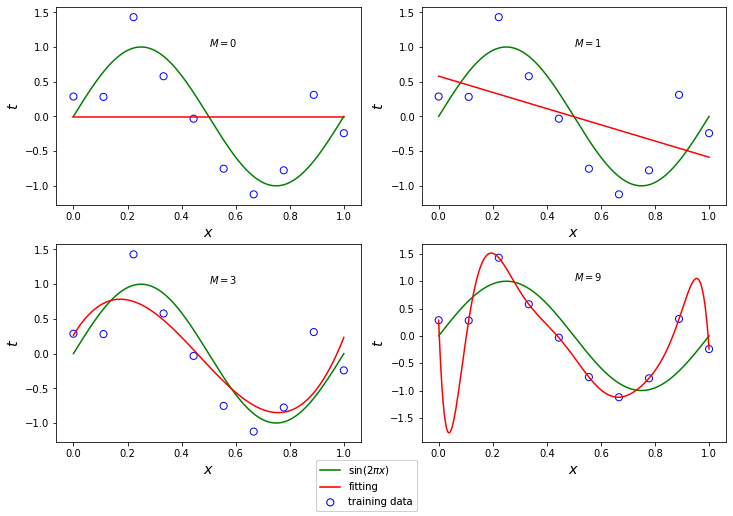

In [3]:
M = [0, 1, 3, 9]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

x_tr = np.linspace(0, 1, 10)
t_tr = np.sin(2*np.pi*x_tr) + np.random.randn(10)*0.35

for ax, degree in zip(axes, M):
    
    coeff = np.polyfit(x_tr, t_tr, degree)
    
    yfun = np.poly1d(coeff)
    
    xx = np.linspace(0, 1, 500)
    ax.scatter(x_tr, t_tr, facecolor="none", edgecolor="blue", s=50, label="training data")
    ax.plot(xx, np.sin(2*np.pi*xx), "g", label="$\sin(2\pi x)$")
    ax.plot(xx, yfun(xx), 'r', label="fitting")
    ax.set_xlabel("$x$",fontsize="x-large")
    ax.set_ylabel("$t$",fontsize="x-large")
    ax.annotate('$M={}$'.format(degree), xy=(0.5,1))
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center")